<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Education - EA  Python Course Spring 2021

## Important  - Assignment Guidelines

1. Before you submit your assignment to GitHub, make sure to run the entire notebook with a fresh kernel. To do this first, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart & Run All)
2. Always replace the `raise NotImplementedError()` code with your code that addresses the activity challenge. If you don't replace that code, your notebook will not run.

```
# YOUR CODE HERE
raise NotImplementedError()
```

3. Any open ended questions will have a "YOUR ANSWER HERE" within a markdown cell. Replace that text with your answer also formatted using Markdown.
4. **DO NOT RENAME THIS NOTEBOOK File!** If the file name changes, the autograder will not grade your assignment properly.
6. When you create a figure, comment out `plt.show()` to ensure the autograder can grade your plots. For figure cells, DO NOT DELETE the code that says `DO NOT REMOVE LINE BELOW`.

```
### DO NOT REMOVE LINE BELOW ###
student_plot1_ax = nb.convert_axes(plt)
```

* Only include the package imports, code, and outputs that are required to run your homework assignment.
* Be sure that your code can be run on any operating system. This means that:
   1. the data should be downloaded in the notebook to ensure it's reproducible
   2. all paths should be created dynamically using the `os.path.join`

## Follow to PEP 8 Syntax Guidelines & Documentation

* Run the `autopep8` tool on all cells prior to submitting (HINT: hit shift + the tool to run it on all cells at once!
* Use clear and expressive names for variables. 
* Organize your code to support readability.
* Check for code line length
* Use comments and white space sparingly where it is needed
* Make sure all python imports are at the top of your notebook and follow PEP 8 order conventions
* Spell check your Notebook before submitting it.

For all of the plots below, be sure to do the following:

* Make sure each plot has a clear TITLE and, where appropriate, label the x and y axes. Be sure to include UNITS in your labels.


### Add Your Name Below 
**Your Name:**

Jensen Widtfeldt

<img style="float: left;" src="colored-bar.png"/>

---

# Week 04 and 05 Homework - Automate NDVI Workflow

For this assignment, you will write code to generate a plot of the mean normalized difference vegetation index (NDVI) for two different sites in the United States across one year of data:

* San Joaquin Experimental Range (SJER) in Southern California, United States
* Harvard Forest (HARV) in the Northeastern United States

The data that you will use for this week is available from **earthpy** using the following download: 

`et.data.get_data('ndvi-automation')`

## Assignment Goals

Your goal in this assignment is to create the most efficient and concise workflow that you can that allows for:

1. The code to scale if you added new sites or more time periods to the analysis.
2. Someone else to understand your workflow.
3. The LEAST and most efficient (i.e. runs fast, minimize repetition) amount of code that completes the task.

### HINTS

* Remove values outside of the landsat valid range of values as specified in the metadata, as needed.
* Keep any output files SEPARATE FROM input files. Outputs should be created in an outputs directory that is created in the code (if needed) and/or tested for.
* Use the functions that we demonstrated during class to make your workflow more efficient.
* BONUS - if you  chose - you can export your data as a csv file. You will get bonus points for doing this.


## Assignment Requirements

Your submission to the GitHub repository should include:
* This Jupyter Notebook file (.ipynb) with:
    * The code to create a plot of mean NDVI across a year for  2 NEON Field Sites:
        * NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object
    * The **data should be cleaned to remove the influence of clouds**. See the [earthdatascience website for an example of what your plot might look like with and without removal of clouds](https://www.earthdatascience.org/courses/earth-analytics-python/create-efficient-data-workflows/).
* BONUS: Create one output `.csv` file that has 3 columns - NDVI, Date and Site Name - with values for SJER and HARV.

Your notebook should:
* Have *at least* 2 well documented and well named functions with docstrings.
* Include a Markdown cell at the top of the notebook that outlines the overall workflow using pseudocode (i.e. plain language, not code)
* Include additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Replace this cell with your pseudocode  for this workflow

If you happen to be a diagram person a diagram is ok too



## Psuedo-workflow! ## 

1. Gather and open the data
- Download data
- List files in download
- Sort / filter for right files

2. Calculate the NDVI and stats
- Open the raster data and crop bands as needed
- Calculate NDVI
- Calculate other key metrics if needed
- Save into sharable form (CSV)
3. Do for other sites
- Use functions and loops for new site
- Rinse and repeat! 


In [1]:
# Autograding imports - do not modify this cell
import matplotcheck.autograde as ag
import matplotcheck.notebook as nb
import matplotcheck.timeseries as ts
from datetime import datetime

In [2]:
# Import needed packages in PEP 8 order
# and no unused imports listed (10 points total)

import os
import re
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import geopandas as gpd
import rioxarray as rxr
import xarray as xr
from rasterio.plot import plotting_extent
import earthpy as et
import earthpy.mask as em
import earthpy.spatial as es
import earthpy.plot as ep 

# Get the data! 
data = et.data.get_data('ndvi-automation')
os.chdir(os.path.join(et.io.HOME, 
                     "earth-analytics",
                     "data"))


In [3]:
# DO NOT MODIFY THIS CELL
# Tests that the working directory is set to earth-analytics/data

path = os.path.normpath(os.getcwd())
student_wd_parts = path.split(os.sep)

if student_wd_parts[-2:] == ['earth-analytics', 'data']:
    print("\u2705 Great - it looks like your working directory is set correctly to ~/earth-analytics/data")
else:
    print("\u274C Oops, the autograder will not run unless your working directory is set to earth-analytics/data")

✅ Great - it looks like your working directory is set correctly to ~/earth-analytics/data


# Figure 1: Plot 1 - Mean NDVI For Each Site Across the Year (50 points)

Create a plot of the mean normalized difference vegetation index (NDVI) for the two different sites in the United States across the year: 

* NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object.
* Each site should be identified with a different color in the plot and legend.
* The final plot **data should be cleaned to remove the influence of clouds**.
* Be sure to include appropriate title and axes labels.

Add additional cells as needed for processing data (e.g. defining functions, etc), but be sure to:
* follow the instructions in the code cells that have been provided to ensure that you are able to use the sanity check tests that are provided. 
* include only the plot code in the cell identified for the final plot code below

## Task 1: 

In the cell below, create a single dataframe containing MEAN NDVI, the site name, 
and the date of the data for the HARV site 
scene `HARV/landsat-crop/LC080130302017031701T1-SC20181023151837`.  The column names for the  final
DataFrame should be`mean_ndvi`, and `site`, and the data should be **indexed on the date**. 

Use the functions that we reviewed in class (or create your own versions of them) to implement your code

### In the Cell below Place  All Functions Needed to Run this Notebook (20 points)

In [4]:
### DO NOT REMOVE THIS LINE OR EDIT / MOVE THIS CELL ###
start_time = datetime.now()

In [5]:
# In this cell place all of the functions needed to run your notebook
# You will be graded here on function application, docstrings, efficiency so ensure
# All functions are placed here!


def open_clean_bands(band_path, 
                    crop_extent,
                    valid_range=None):
    
    """"Open and mask a landsat band with squeeze.

    Parameters
    ----------
    band_path : string
        Path to the array you use
    valid_range : tuple
        A range for min and max values for the data. 


    Returns
    -------
    band : xarray DataArray
        An xarray with invalid values that are masked 
    """
    band = (rxr.open_rasterio(band_path, masked=True)
           .rio.clip(crop_extent.geometry, from_disk=True)
           .squeeze())
    
    # specify the valid range
    if valid_range:
            mask = (band <= 0) | (band > 10000)
            band = band.where(~mask, np.nan)
        
    
    return band

# Function 2: Mask cloud bands and crop 

def mask_crop_ndvi(all_band_paths,
                  crop_bound, 
                  pixel_qa_path,
                  vals):
    """Open a landsat band, mask potential clouds, and calculate NDVI.

    Parameters
    -----------
    all_band_paths : list
        a list for the xarray objects (using landsat  bands 4 and 5)
    crop_bound: gpd GeoDataFrame
        A geopandas dataframe  to crop the raster data (rasterio)
    pixel_qa_path: xarray DataArray
        An xarray DataArray with pixel qa values
    vals: list
        A list of values needed to create the cloud mask


    Returns
    -----------
    ndvi_mark : Xarray Dataset
        a cropped and masked xarray object containing NDVI values
    
    """
    # open all bands
    bands = []
    for band_path in all_band_paths: 
        band = open_clean_bands(
            band_path=band_path,
            crop_extent=crop_bound,
            valid_range=(0, 10000))
        bands.append(band)

    
    # open and mask cloud layer
    cl_mask =  (rxr.open_rasterio(pixel_qa_path[0], masked=True)
                    .rio.clip(crop_bound.geometry, from_disk=True)
                    .squeeze())
        
    # final NVDI calcs 
    ndvi_xr = (bands[1]-bands[0]) / (bands[1]+bands[0])
    
    # apply cloud mask to NDVI
    ndvi_mask = ndvi_xr.where(~cl_mask.isin(vals))
    
    return ndvi_mask


## Create code to navigate directories for Figure 1 ##

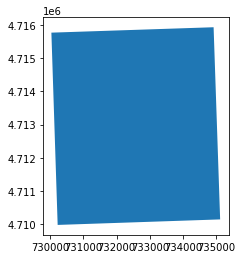

In [6]:
# Background code prior to functions

# Navigate the site data
path = os.path.join("ndvi-automation", 
                   "sites")
all_sites = glob(path + "/*/")

# define path to HARV sites
site_name = os.path.basename(os.path.normpath(all_sites[0]))

#Open shapefile for first site
vector_dir = os.path.join(all_sites[0], "vector")
site_boundary_path = os.path.join(vector_dir,
                                  site_name + "-crop.shp")
crop_bound = gpd.read_file(site_boundary_path)
crop_bound.plot()
plt.show()

# explore HARV landsat paths
HARV_landsat_dirs = sorted(glob(os.path.join(
                            all_sites[0], "landsat-crop", "*")))

# pick the right directory for HARV LC080130302017031701T1-SC20181023151837
HARV_dir = HARV_landsat_dirs[4]

# grab the bands needed for NDVI 
HARV_band_paths = sorted(glob(os.path.join(HARV_dir,
                                           "*band*[4-5].tif")))

# get components
HARV_path = os.path.normpath(HARV_dir)
HARV_path_components = HARV_path.split(os.sep)
HARV_date = HARV_path_components[-1][10:18]

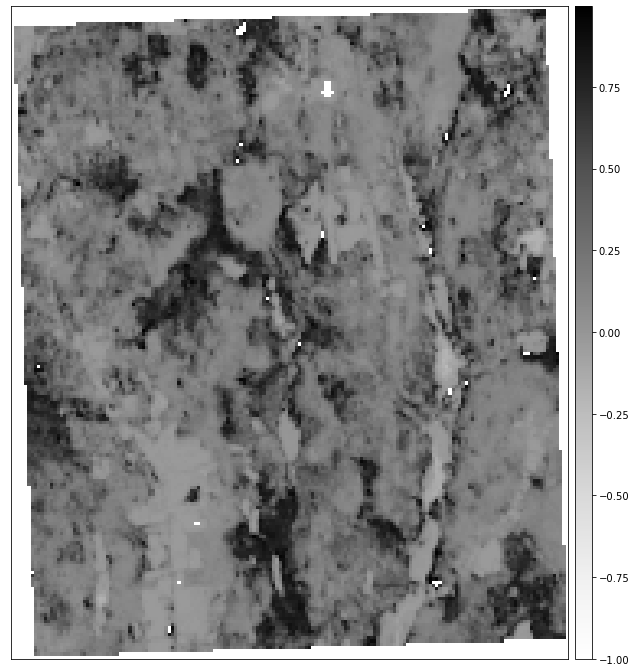

0.281131628228094


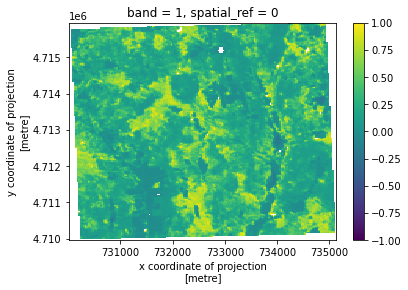

In [7]:
# Test Function 1 with a loop! 
bands = []
for band_path in HARV_band_paths: 
    band = open_clean_bands(
            band_path=band_path,
            crop_extent=crop_bound,
            valid_range=(0, 10000))
    bands.append(band)
        
# calculate NDVI 
ndvi_2 = es.normalized_diff(bands[1], bands[0])
ep.plot_bands(ndvi_2,
          cmap="Greys",
          vmin=-1)
ndvi_2_mean = ndvi_2.mean()
print(ndvi_2_mean)

# test Function 2 with another loop for HARV
# prep by creating cloud masks for functions to deal with pesky clouds 

high_cloud_confidence = em.pixel_flags[
                        "pixel_qa"]["L8"]["High Cloud Confidence"]
cloud = em.pixel_flags[
    "pixel_qa"]["L8"]["Cloud"]
cloud_shadow = em.pixel_flags[
            "pixel_qa"]["L8"]["Cloud Shadow"]

all_masked_values = cloud_shadow + cloud + high_cloud_confidence

# Prep by open cloud mask layer for HARV
HARV_pixel_qa_path = glob(os.path.join(HARV_dir, "*qa*"))


#Now use with a for loop to generate NDVI for HARV site
HARV_ndvi_clean = []

for band_path in HARV_band_paths:
    ndvi_clean = mask_crop_ndvi(all_band_paths=HARV_band_paths,
                                crop_bound=crop_bound,
                                pixel_qa_path=HARV_pixel_qa_path,
                                vals=all_masked_values)
    site=HARV_path_components[2]
    date=HARV_band_paths[0][-27:-19]
    mean_ndvi=ndvi_clean.mean().values
    # create output
    output = [site,date,mean_ndvi]
    HARV_ndvi_clean.append(output)

#create dataframe from output and set date index
HARV_df = pd.DataFrame(HARV_ndvi_clean,
                       columns=["site","date","mean_ndvi"])
HARV_df['date'] = pd.to_datetime(HARV_df['date'],
                                 format='%Y-%m-%d')
HARV_df_indexed = HARV_df.set_index("date")

# test view the final cropped and cleaned NDVI data
ndvi_clean.plot.imshow(vmin=-1,
                      vmax=1)

In [8]:
# Create dataframe of mean NDVI in this cell using the functions created above
# Important: to use the ungraded tests below as a sanity check,
# name your columns: mean_ndvi and site
# Call the dataframe at the end of the cell so the tests run on it!
# Be sure that the date column is an index of type date
# HINT: the time series lessons may help you remember how to do this!

#clean and view the HARV dataframe 
HARV_df_final = HARV_df_indexed[:-1]
HARV_df_final

,site,mean_ndvi
date,,
2017-03-28,HARV,0.281131628228094


In [9]:
# This cell  is testing your data output above

student_ndvi_ts_single_site = _

single_scene_points = 0

# Ensure the data is stored in a dataframe.
if isinstance(student_ndvi_ts_single_site, pd.DataFrame):
    print('\u2705 Your data is stored in a DataFrame!')
    single_scene_points += 1
else:
    print('\u274C It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Ensure that the date column is the index
if isinstance(student_ndvi_ts_single_site.index, pd.core.indexes.datetimes.DatetimeIndex):
    print('\u2705 You have the index set to the date column!')
    single_scene_points += 2
else:
    print('\u274C You do not have the index set to the date column.')

# Ensure that the date column is datetime
if isinstance(student_ndvi_ts_single_site.index[0], pd._libs.tslibs.timestamps.Timestamp):
    print('\u2705 The data in your date column is datetime!')
    single_scene_points += 2
else:
    print('\u274C The data in your date column is not datetime.')

# Ensure the site name is correct
if student_ndvi_ts_single_site.site.values[0] == 'HARV':
    print('\u2705 You have the correct site name!')
    single_scene_points += 5
else:
    print('\u274C You do not have the correct site name.')

if np.allclose(0.281131628228094, student_ndvi_ts_single_site.mean_ndvi.values[0]):
    print('\u2705 You have the correct mean NDVI value!')
    single_scene_points += 5
else:
    print('\u274C You do not have the correct mean ndvi value.')

print("\n \u27A1 You received {} out of 15 points for creating a dataframe.".format(
    single_scene_points))
single_scene_points

✅ Your data is stored in a DataFrame!
✅ You have the index set to the date column!
✅ The data in your date column is datetime!
✅ You have the correct site name!
✅ You have the correct mean NDVI value!

 ➡ You received 15 out of 15 points for creating a dataframe.


15

## Task 2:

In the cell below, process all of the landsat scenes. Create a DataFrame that contains the following 
information for each scene


|   | index  | site  | mean_ndvi  | 
|---|---|---|---|
| Date  |   |   |   |
|  2017-01-07  | 0  | SJER  | .4  |  

Be sure to call your dataframe at the end of the cell to ensure autograding works.
HINT: FOR THIS STEP, leave any rows containing missing values (`NAN`).

Looping through ndvi-automation\sites\HARV\
Working through HARV


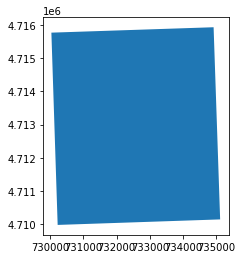

Looping through ndvi-automation\sites\SJER\
Working through SJER


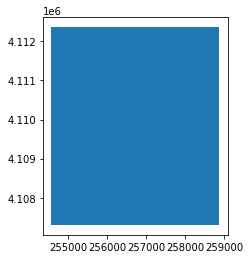

,site,mean_ndvi
date,,
2017-01-12,HARV,NaN
2017-01-28,HARV,NaN
2017-02-13,HARV,NaN
2017-03-01,HARV,NaN
2017-03-17,HARV,0.281132
2017-04-02,HARV,0.251109
2017-04-18,HARV,0.541080
2017-05-04,HARV,0.568924
2017-05-20,HARV,0.811310


In [10]:
# Create dataframe of NDVI including the cleaning data to deal with clouds

# Important: to use the ungraded tests below as a sanity check,
# name your columns: mean_ndvi and site
# Don't forget to set date as the index and make the values of type datetime

# Create dataframe by loping through file paths
# Create empty list for dataframe
ndvi_list = []

# loop for each site
for site_dir in all_sites:
    print("Looping through", site_dir)
    asite = os.path.normpath(site_dir).split(os.sep)[-1]
    print("Working through", asite)
    
    # define crop_bound for each site
    site_boundary_path = os.path.join(path, asite,
                                      "vector", asite + "-crop.shp")
    site_crop_bound = gpd.read_file(site_boundary_path)
    site_crop_bound.plot()
    plt.show()
    
    #get a list of subdirectories for each site 
    new_path=os.path.join(site_dir, "landsat-crop")
    all_dirs=glob(new_path + "/*/")
        
    # loop through the subdirectories to get the data!  
    for single_dir in all_dirs:
        
        # pull out date from subdirectory name
        scene_date = single_dir.split(os.sep)[-2][-29:-21]
        
        # Create path for the pixel_qa_layer for each subdirectory scene
        scene_pixel_qa_path = glob(os.path.join(single_dir, "*qa*"))
        
        # define band paths used for NDVI calcs in each subdirectory
        total_band_paths = sorted(glob(os.path.join(single_dir,
                                                    "*band*[4-5].tif")))

        # calc NDVI
        ndvi = mask_crop_ndvi(all_band_paths=total_band_paths,
                           crop_bound=site_crop_bound,
                           pixel_qa_path=scene_pixel_qa_path,
                           vals=all_masked_values)
        mean_ndvi = ndvi.mean(skipna=True).item()
        # create output 
        output = [asite, scene_date, mean_ndvi]
        #append
        ndvi_list.append(output)
        
#create dataframe
ndvi_df = pd.DataFrame(ndvi_list,
                       columns=["site","date","mean_ndvi"])
ndvi_df['date'] = pd.to_datetime(ndvi_df['date'], format='%Y-%m-%d')
ndvi_df_indexed = ndvi_df.set_index("date")

ndvi_df_indexed

In [11]:
# Last sanity check before creating your plot (10 points)

# Ensure that you call your dataframe at the bottom of the cell above
# and that it has columns called: mean_ndvi and site

# Ensure the data is stored in a dataframe.
student_ndvi_df = _

df_points = 0

if isinstance(student_ndvi_df, pd.DataFrame):
    print('\u2705 Your data is stored in a DataFrame!')
    df_points +=2
else:
    print('\u274C It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Check that dataframe contains the appropriate number of NAN values
if student_ndvi_df.mean_ndvi.isna().sum() == 15:
    print('\u2705 Correct number of masked data values!')
    df_points +=2
else:
    print('\u274C The amount of null data in your dataframe is incorrect.')


# Ensure that the date column is the index
if isinstance(student_ndvi_df.index, pd.core.indexes.datetimes.DatetimeIndex):
    print('\u2705 You have the index set to the date column!')
    df_points +=3
else:
    print('\u274C You do not have the index set to the date column.')

# Ensure that the date column is datetime
if isinstance(student_ndvi_df.index[0], pd._libs.tslibs.timestamps.Timestamp):
    print('\u2705 The data in your date column is datetime!')
    df_points +=3
else:
    print('\u274C The data in your date column is not datetime.')

# Output for timer, # DO NOT MODIFY
end_time = datetime.now()
total_time = end_time - start_time
print(
    "Your total run time for processing the data was {0}.".format(total_time))

print("\n \u27A1 You received {} out of 10 points for creating a dataframe.".format(
    df_points))

df_points

✅ Your data is stored in a DataFrame!
✅ Correct number of masked data values!
✅ You have the index set to the date column!
✅ The data in your date column is datetime!
Your total run time for processing the data was 0:00:12.198992.

 ➡ You received 10 out of 10 points for creating a dataframe.


10

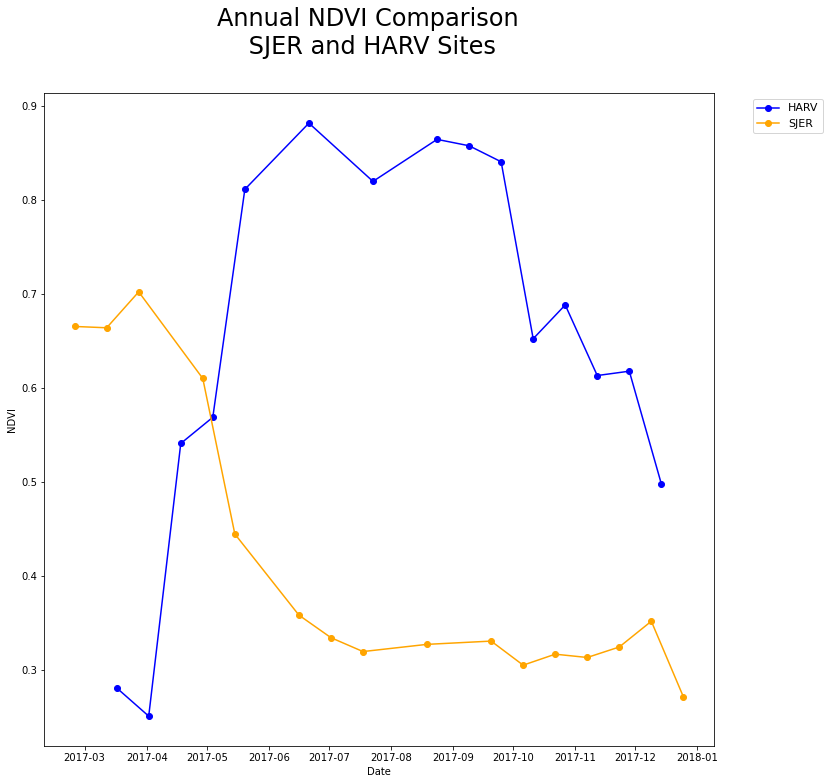

In [12]:
# Add only the plot code to this cell

# This is the final figure of mean NDVI
# for both sites across the year
# with data cleaned to deal with clouds

# Create plot
fig, ax = plt.subplots(figsize=(12, 12))
fig.suptitle("Annual NDVI Comparison\n SJER and HARV Sites", fontsize = 24)

# Loops for each subplot

#subplot 1
for site, df in ndvi_df_indexed.dropna().groupby('site'):
    if site == "HARV":
        loc = "HARV"
        color = "blue"
    else:
        loc = "SJER"
        color = "orange"
    ax.plot(df.index,
             df.mean_ndvi,
             label=loc,
             color=color,
                marker="o")
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
              prop={'size': 11})
    ax.set(xlabel = "Date",
           ylabel = "NDVI")


### DO NOT REMOVE LINES BELOW ###
final_masked_solution = nb.convert_axes(plt, which_axes="current")

In [13]:
# Ignore this cell for the autograding tests


In [14]:
# Ignore this cell for the autograding tests


# Question 1 (10 points)

Imagine that you are planning NEON’s upcoming flight season to capture remote sensing data in these locations and want to ensure that you fly the area when the vegetation is the most green.

When would you recommend the flights take place for each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

## Answer ## 
For the HARV site, the data shows highest vegetation density from May to October. For the SJER site, March and April show the highest vegetation amounts. 

# Question 2 (10 points)

How could you modify your workflow to look at vegetation changes over time in each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

## Answer ##

To look for vegetation changes over time, you can compare the NDVI for the same month year-over-year. A higher NDVI for the same month year-over-year would indicate that the selected year has a higher vegetation year than previous years

# Do not edit this cell! (10 points)

The notebook includes:
* additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Do not edit this cell! (20 points)

The notebook will also be checked for overall clean code requirements as specified at the **top** of this notebook. Some of these requirements include (review the top cells for more specifics): 

* Notebook begins at cell [1] and runs on any machine in its entirety.
* PEP 8 format is applied throughout (including lengths of comment and code lines).
* No additional code or imports in the notebook that is not needed for the workflow.
* Notebook is fully reproducible. This means:
   * reproducible paths using the os module.
   * data downloaded using code in the notebook.
   * all imports at top of notebook.

## BONUS - Export a  .CSV File to Share (10 points possible)

This is optional - if you export a **.csv** file with the columns specified above: Site, Date and NDVI Value you can get an additional 10 points.

* FULL CREDIT: File exists in csv format and contains the columns specified.
We will check your github repo for this file!


In [15]:
outpath = os.path.join("ndvi-automation\outputs\mean_ndvi_both_sites.csv")
ndvi_df_export = ndvi_df_indexed.reset_index()
ndvi_df_export.to_csv(outpath, index=False)
ndvi_df_export

,date,site,mean_ndvi
0,2017-01-12,HARV,NaN
1,2017-01-28,HARV,NaN
2,2017-02-13,HARV,NaN
3,2017-03-01,HARV,NaN
4,2017-03-17,HARV,0.281132
5,2017-04-02,HARV,0.251109
6,2017-04-18,HARV,0.541080
7,2017-05-04,HARV,0.568924
8,2017-05-20,HARV,0.811310
9,2017-06-05,HARV,NaN
